# **CH08 텍스트 분석**

---

# **20230608**

### O NLP 이냐 텍스트 분석이냐?

- NLP : 언어를 해석하기 위한 기계 번역, 자동으로 질문을 해석하고 답을 해주는 질의 응답 시스템 (=chatbot) 등

- 텍스트 분석의  기술들
    
    - **텍스트 분류** : 문서가 특정 분류 또는 카테고리에 속하는 것을 예측하는 기법 <br> $\Rightarrow$ 지도학습 

    - **감성 분석** : 텍스트에서 나타나는 감정/판단/믿음/의견/기분 등의 주관적인 요소를 분석하는 기법 <br> $\Rightarrow$ 지도/비지도 학습

    - **텍스트 요약** : 텍스트 내에서 중요한 주제나 중심 사상을 추출하는 기법<br>
    ex) 토픽 모델링

    - **텍스트 군집화와 유사도 측정** : 비슷한 유형의 문서에 대한 군집화를 수행하는 기법

## **01 텍스트 분석 이해** 

- 텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것

- 텍스트=문자 $\rightarrow$ 머신러닝에 적용하기 위해 인코딩/임베딩 필요

    - 인코딩 : 단순히 문자를 숫자로 변환
    
    - 임베딩 : 단어 사이의 관계를 고려해 의미있는 숫자로 변환  
    - Tokenizer : 텍스트 문장을 단어로 분리

    - Vectorizer : 분리된 단어 숫자로 변환(인코딩)

- 텍스트를 피처로 추출한다 = 숫자로 변환 = 피처 벡터화 or 피처 추출 <br>
    (ex: BOW, Word2Vec)

### O 텍스트 분석 수행 프로세스

1. 텍스트 사전 준비 작업(**텍스트 전처리**) : 텍스트를 피처로 만들기 전에 미리 클렌징, 대/소문자 변경, 특수 문자 삭제 등의 클렌징 작업, 단어 등의 토큰화(분리) 작업, 의미 없는 단어(Stop word) 제거 작업, 어근 추출(Stemming/Lemmatization) 등의 <br> ***텍스트 정규화 작업***을 수행하는 것

2. **피처 벡터화**/~~추출~~ :  사전 준비 작업으로 가공된 텍스트에서 피처를 추출하고 여기에 벡터값을 할당합니다. 대표적인 방법은 *BOW와 Word2Vec*이 있으며, BOW는 대표적으로 *Count 기반과 TF-IDF 기반* 벡터화가 있습니다.

3. ML 모델 수립 및 학습/예측/평가 : 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가를 수행

<br>


+) 어근 : 의미가 부여된 최소 단위(갈 것이다. 갔었니? => '간다')

### O 파이썬 기반의 NLP, 텍스트 분석 패키지

- NLTK(Natural Language Toolkit for Python) $\Rightarrow$ 영어 기반

- Gensim

- SpaCy


## **02 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**


- 자연어 처리에서의 피처 = 숫자로 된 데이터

- 텍스트 자체를 바로 피처로 만들 수 없다 -> 데이터를 가공하는 사전 준비 작업 필요

    - 클렌징
    - 토큰화
    - 필터링/스톱 워드(잘 사용하지 않는 단어/ 많이 사용하는 단어) 제거 / 철자 수정
    - Stemming/Lemmantization : 어근 추출

### O 클렌징

: 텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업(HTML, XML 태그, 특정 기호 등)

### O 텍스트 토큰화

#### ㅇ 문장 토큰화

In [2]:
# !pip install nltk

In [3]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text=text_sample)  # 문단 분리 => 리스트
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


#### ㅇ 단어 토큰화

문장을 단어별로 하나씩 토큰화 할 경우 문맥적인 의미는 무시될 수 밖에 없다. <br>
~ n_gram으로 `조금` 문제 해결 
<br>
- n_gram : 연속된 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것.

In [5]:
from nltk import word_tokenize


sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)


<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


In [6]:
from nltk import word_tokenize, sent_tokenize


#여러개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화 만드는 함수 생성
def tokenize_text(text):
   
    # 문장별로 분리 토큰
    sentences = sent_tokenize(text)
    # 분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens


#여러 문장들에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens),len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


### O 스톱 워드 제거

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# corpus : 말뭉치(사전)

print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [9]:
import nltk


stopwords = nltk.corpus.stopwords.words('english')

all_tokens = []

# 위 예제의 3개의 문장별로 얻은 word_tokens list 에 대해 stop word 제거 Loop
for sentence in word_tokens:
    filtered_words=[]
    # 개별 문장별로 tokenize된 sentence list에 대해 stop word 제거 Loop
    for word in sentence:
        #소문자로 모두 변환합니다.
        word = word.lower()
        # tokenize 된 개별 word가 stop words 들의 단어에 포함되지 않으면 word_tokens에 추가
        if word not in stopwords:
            filtered_words.append(word)
    all_tokens.append(filtered_words)
   
print(all_tokens)



[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


### O Stemming과 Lemmatization


- Stemming은 성능 좋지 않음 사용x

In [10]:
# Stemming

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()


print(stemmer.stem('working'),stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'),stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'),stemmer.stem('happiest'))
print(stemmer.stem('fancier'),stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


In [11]:
# Lemmatization

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


amuse amuse amuse
happy happy
fancy fancy


## **03 Bag of Words - BOW**

: 문서가 가지는  모든 단어를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델

- 단점

    - 문맥 의미 반영 부족

    - 희소 행렬(Sparse Matrix) 문제



+) 희소 행렬 <->  밀집 행렬(Dense Matrix)

### O BOW 피처 벡터화

- count 기반의 벡터화

- TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화 <br>
: 개별 문서에서 자주 나타나는 단어에는 높은 가중치를 주되,<br> 모든 문서에서 전반적으로 *자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여*


### O 사이킷런의 Count 및 TF-IDF 벡터화 구현 : CountVectorizer, TfidVectorizer

#### **ㅇ CountVectorizer**

-> tokenizer 역할도 함

|파라미터 명| 파라미터 설명 |
|---|---|
|***max_df***|- 빈도수가 너무 **높은** 단어 피처 제거 <br> - 정수값(100) : 100개 초과 단어 제거 <br> - 부동소수점 값(0.95) : 상위 5% 제거|
|***min_df***|- 빈도수가 너무 **낮은** 단어 피처 제거 <br> - 정수(2) : 2번 이하 단어 제거 <br> - 부동소수점값(0.0~0.1:a) : 빈도수 a%이하 단어 제거|
|***max_featues***|- 추출하는 피처의 개수를 제한하며 정수로 값을 지정.<br> - 높은 빈도수 순 정렬, max개까지만 피처로 추출|
|stop_words|'english'로 지정하면 영어의 스톱 워드로 지정된 단어는 추출에서 제외|
|**n_gram_range**|- BOW 모델의 단어 순서를 어느정도 보강하기 위한 n_gram 범위 설정.<br> - 튜플 형태 (범위 최소, 최대)|
|analyzer|- 피처 추출을 수행한 단위를 지정. <br> - default = 'word'|
|**token_pattern**|- 토큰화를 수행하는 정규 표현식 패턴 지정. <br> - default : '\b\w\w+\b'|
|tokenizer|- 토큰화를 별도의 커스텀 함수로 이용시 적용함|


- 벡터화 순서

1. 사전 데이터 가공
2. 토큰화
3. 텍스트 정규화
4. 피처 벡터화

#### ㅇ TfidVectorizer 

CounterVectorizer와 동일

### O BOW 벡터화를 위한 희소 행렬

- 희소 행렬 = 0값이 많은 행렬 => 메모리 누수

### O 희소 행렬 - COO(Coordinate:좌표) 형식

: 0이 아닌 데이터의 위치(좌표)를 배열로 저장

- coo 보단 csr 사용

In [12]:
# coo 형식을 희소행렬로 변환 -> sparse.coo_matrix()

import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [13]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용해 coo형식으로 희소행렬 생성
sparse_coo = sparse.coo_matrix((data,(row_pos,col_pos)))

In [14]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### O 희소 행렬 - CSR 형식


- coo 방식을 한번 더 압축한 버전 => 메모리 차지 적음 => 효과적

In [15]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출

data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# coo 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos,col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# csr형식으로 변환
sparse_csr = sparse.csr_matrix((data2,col_pos,row_pos_ind))

print('coo 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('csr 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

coo 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
csr 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


## **04 텍스트 분류 실습 - 20 뉴스 그룹 분류**

### O 텍스트 정규화

In [16]:
# 데이터 로딩
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all',random_state=156)

In [17]:
print(news_data.keys)

<built-in method keys of Bunch object at 0x000001E86C93AAC0>


In [18]:
import numpy as np

print(np.unique(news_data.target))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [19]:
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [20]:
import pandas as pd

print('target 클래스의 값과 분포도 \n',pd.Series(news_data.target).value_counts().sort_index())

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
Name: count, dtype: int64


In [21]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

In [22]:
# train 데이터 본문만
train_news = fetch_20newsgroups(
                                subset='train'
                               , remove=('headers','footers','quotes')
                               ,random_state=156
                               )

 # test
test_news = fetch_20newsgroups(
                                subset='test'
                               , remove=('headers','footers','quotes')
                               ,random_state=156
                               )

In [23]:
len(train_news.data), len(test_news.data)

(11314, 7532)

In [24]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

### O 피처 벡터화 변환과 머신러닝 모델 학습/예측/평가

In [25]:
X_train = train_news.data
y_train = train_news.target

X_test = test_news.data
y_test = test_news.target

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# 어휘 사전의 단어 수를 동일하게 하기 위해 train으로 fit 한 것으로 test도 transform 함
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)

X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 텍스트의 CountVectorizer Shape:', X_train_cnt_vect.shape)
print('테스트 데이터 텍스트의 CountVectorizer Shape:', X_test_cnt_vect.shape)

학습 데이터 텍스트의 CountVectorizer Shape: (11314, 101631)
테스트 데이터 텍스트의 CountVectorizer Shape: (7532, 101631)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_cnt_vect , y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

CountVectorized Logistic Regression 의 예측 정확도는 0.617


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


# TF-IDF Vectorization 적용하여 학습 데이터셋과 테스트 데이터 셋 변환.
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)


# LogisticRegression을 이용하여 학습/예측/평가 수행.
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Logistic Regression 의 예측 정확도는 0.678


In [29]:
# stop words 필터링을 추가하고 ngram을 기본(1,1)에서 (1,2)로 변경하여 Feature Vectorization 적용.
tfidf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300 )
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)


lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train_tfidf_vect , y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.690


In [30]:
from sklearn.model_selection import GridSearchCV


# 최적 C 값 도출 튜닝 수행. CV는 3 Fold셋으로 설정.
params = { 'C':[0.01, 0.1, 1, 5, 10]}
grid_cv_lr = GridSearchCV(lr_clf ,param_grid=params , cv=3 , scoring='accuracy' , verbose=1 )
grid_cv_lr.fit(X_train_tfidf_vect , y_train)
print('Logistic Regression best C parameter :',grid_cv_lr.best_params_ )


# 최적 C 값으로 학습된 grid_cv로 예측 수행하고 정확도 평가.
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Vectorized Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Logistic Regression best C parameter : {'C': 10}
TF-IDF Vectorized Logistic Regression 의 예측 정확도는 0.704


---

# **20230609**

### O 사이킷런 파이프라인(Pipeline) 사용 및 GridSearchCV와의 결합


-사이킷런의 Pipeline 클래스를 이용하면 피처 벡터화와 ML 알고리즘 학습/예측을 위한 코드 작성을 한번에 진행 할 수 있다.

- Pipeline 이란 데이터의 가공, 변환 등의 전처리와 알고리즘 적용을 한꺼번에 스트림 기반으로 처리한다는 의미 <br>
$\rightarrow$ 데이터의 전처리, 머신러닝 학습 과정을 통일된 API기반에서 처리할 수 있어 더 직관적인 ML모델 코드를 생성할 수 있다.

-

In [31]:
from sklearn.pipeline import Pipeline


# 리스트 내의[튜플 형태(변수명, 적용할 방식(object))들] -> 순서대로 실행
# TfidfVectorizer 객체를 tfidf_vect 객체명으로, LogisticRegression객체를 lr_clf 객체명으로 생성하는 Pipeline생성
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_df=300)),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))
])


# 별도의 TfidfVectorizer객체의 fit_transform( )과 LogisticRegression의 fit(), predict( )가 필요 없음.
# pipeline의 fit( ) 과 predict( ) 만으로 한꺼번에 Feature Vectorization과 ML 학습/예측이 가능.
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.704


In [32]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression(solver='liblinear'))
])


# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될
# 파라미터/하이퍼 파라미터 이름과 값을 설정. .
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1, 5, 10]
}


# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)


pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'lr_clf__C': 10, 'tfidf_vect__max_df': 700, 'tfidf_vect__ngram_range': (1, 2)} 0.7550828826229531
Pipeline을 통한 Logistic Regression 의 예측 정확도는 0.702


## **05 감성 분석**

### O 감성 분석(Sentiment Analysis) 소개

: 문서의 주관적인 감성/의견/감정/기분 등을 파악하기 위한 방법으로 소셜 미디어, 여론조사, 온라인 리뷰, 피드백 등 다양한 분야에서 활용되고 있다. 감성분석은 문서 내 텍스트가 나타내는 여러가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산

- 이러한 감성지수는 긍정 감성지수와 부정 감성지수로 구성됨

<br>

- **지도학습** : **학습 데이터와 타깃 레이블 값**을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일

- 비지도학습 : 성능 별로


### O 지도학습 기반 감성 분석 실습 - IMDB 영화평

In [49]:
import pandas as pd
import numpy as np


review_df = pd.read_csv('../data/labeledTrainData/labeledTrainData.tsv'
                        , header=0
                        , sep='\t'
                        , quoting=3
                        )

review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [50]:
# 첫번째 리뷰

print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [51]:
import re

# <br> html 태그 공백으로 replace 변환
review_df['review'] = review_df['review'].str.replace('<br /',' ')

# 영어 문자열이 아닌 문자 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x : re.sub("[^a-zA-Z]",' ',x))

In [52]:
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']

feature_df = review_df.drop(['id','sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df  # 리뷰
                                                    ,class_df   # 답
                                                    ,test_size=0.3
                                                    ,random_state=156)

X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [53]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score


# 스톱 워드는 English, filtering, ngram은 (1,2)로 설정해 CountVectorization수행.
# LogisticRegression의 C는 10으로 설정.
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1,2) )),
    ('lr_clf', LogisticRegression(solver='liblinear', C=10))])


# Pipeline 객체를 이용하여 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc때문에 수행.  
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:,1]


print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test ,pred),
                                         roc_auc_score(y_test, pred_probs)))



예측 정확도는 0.8863, ROC-AUC는 0.9503


### O 비지도 학습 기반 감성 분석 소개

### O SentiWordNet을 이용한 감성 분석

### O VADER를 이용한 감성 분석

## **06 토픽 모델링(Topic Modeling) - 20 뉴스 그룹**


- 토픽 모델링 : 잠재적 주제 찾기 = 주성분 분석

#### ㅇ LDA(Latent Dirichlet Allocation, 잠재 디리클레 할당)

: 토픽 모델링의 대표적인 알고리즘

In [55]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# 모터사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출.
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]


# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'),
                            categories=cats, random_state=0)


#LDA는 Count 기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)


CountVectorizer Shape: (7862, 1000)


In [56]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [60]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #',topic_index)


        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]
       
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)


# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names_out()

# Topic별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


## **07 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**

### O 문서 군집화 개념

: 문서 군집화(Documnet Clustering)는 비슷한 텍스트 구성의 문서를 군집화(Clustering)하는 것

$\Rightarrow$ 비지도학습 기반

### O Opinion Review 데이터 세트를 이용한 문서 군집화 수행하기


- Opinion Review 데이터 세트

    - 51개의 텍스트 파일로 구성
    - 파일명이 label(답)

In [109]:
# 절대경로 : C:\big16\ml-dev\data\topics
# 상대경로 : data\topics


import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 700)


# 아래는 제 컴퓨터에서 압축 파일을 풀어 놓은 디렉터리이니, 여러분의 디렉터리를 설정해 주세요  
path = r'C:\big16\ml-dev\data\topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일들의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))    
filename_list = []
opinion_text = []


# 개별 파일들의 파일명은 filename_list 리스트로 취합,
# 개별 파일들의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환하여 opinion_text 리스트로 취합
for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
   
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경.
    # 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('\\')[-1]   # 중간과정의 변수 생성시 변수명_ 로 주로 지정
    filename = filename_.split('.')[0]


    # 파일명 리스트와 파일 내용 리스트에 파일명과 파일 내용을 추가.
    filename_list.append(filename)
    opinion_text.append(df.to_string())


# 파일명 리스트와 파일 내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ..."
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ..."
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now..."


---

# **20230612**

- LemNormalize() 함수

: 

In [110]:
from nltk.stem import WordNetLemmatizer     # 어근 추출
import nltk
import string

# punct : 마침표, 개행문자,...
# ord : 숫자로 변환
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()


# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환.
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]


# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [111]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )


#opinion_text 컬럼값으로 feature vectorization 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [113]:
feature_vect.shape

(51, 4611)

In [114]:
from sklearn.cluster import KMeans


# 5개 집합으로 군집화 수행. 예제를 위해 동일한 클러스터링 결과 도출용 random_state=0
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [115]:
document_df['cluster_label'] = cluster_label
document_df.head()

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",2
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",0
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",1
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",1


In [116]:
# 호텔
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and very comfortable beds, a great shower and very clean bathrooms .\n0 The second room was smaller, with a very inconvenient bathroom layout, but at least it was quieter and we were able to sleep .\n1 ...",0
32,room_holiday_inn_london,"We arrived at 23,30 hours and they could not recommend a restaurant so we decided to go to Tesco, with very limited choices but when you are hingry you do not careNext day they rang the bell at 8,00 hours to clean the room, not being very nice being waken up so earlyEvery day they gave u...",0
30,rooms_bestwestern_hotel_sfo,"Great Location , Nice Rooms , H...",0
31,rooms_swissotel_chicago,"The Swissotel is one of our favorite hotels in Chicago and the corner rooms have the most fantastic views in the city .\n0 The rooms look like they were just remodled and upgraded, there was an HD TV and a nice iHome docking station to put my iPod so I could set the alarm to wake up with my music instead of the radio .\n1 ...",0


In [117]:
# 전자 기기
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
2,battery-life_amazon_kindle,"After I plugged it in to my USB hub on my computer to charge the battery the charging cord design is very clever !\n0 After you have paged tru a 500, page book one, page, at, a, time to get from Chapter 2 to Chapter 15, see how excited you are about a low battery and all the time it took to get there !\n1 ...",1
3,battery-life_ipod_nano_8gb,short battery life I moved up from an 8gb .\n0 I love this ipod except for the battery life .\n1 ...,1
4,battery-life_netbook_1005ha,"6GHz 533FSB cpu, glossy display, 3, Cell 23Wh Li, ion Battery , and a 1 .\n0 Not to mention that as of now...",1
19,keyboard_netbook_1005ha,", I think the new keyboard rivals the great hp mini keyboards .\n0 Since the battery life difference is minimum, the only reason to upgrade would be to get the better keyboard .\n1 The keyboard is now as good as t...",1
26,performance_netbook_1005ha,"The Eee Super Hybrid Engine utility lets users overclock or underclock their Eee PC's to boost performance or provide better battery life depending on their immediate requirements .\n0 In Super Performance mode CPU, Z shows the bus speed to increase up to 169 .\n1 One...",1
41,size_asus_netbook_1005ha,"A few other things I'd like to point out is that you must push the micro, sized right angle end of the ac adapter until it snaps in place or the battery may not charge .\n0 The full size right shift k...",1
42,sound_ipod_nano_8gb,headphone jack i got a clear case for it and it i got a clear case for it and it like prvents me from being able to put the jack all the way in so the sound can b messsed up or i can get it in there and its playing well them go to move or something and it slides out .\n0 Picture and sound quality are excellent for this typ of devic .\n1 ...,1
44,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",1


In [118]:
# 차량용 내비게이션
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",2
5,buttons_amazon_kindle,"I thought it would be fitting to christen my Kindle with the Stephen King novella UR, so went to the Amazon site on my computer and clicked on the button to buy it .\n0 As soon as I'd clicked the button to confirm my order it appeared on my Kindle almost immediately !\n1 ...",2
8,directions_garmin_nuvi_255W_gps,You also get upscale features like spoken directions including street names and programmable POIs .\n0 I used to hesitate to go out of my directions but no...,2
9,display_garmin_nuvi_255W_gps,"3 quot widescreen display was a bonus .\n0 This made for smoother graphics on the 255w of the vehicle moving along displayed roads, where the 750's display was more of a jerky movement .\n1 ...",2
10,eyesight-issues_amazon_kindle,"It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .\n0 the white is really GREY, and to avoid considerable eye, strain I had to refresh pages every other page .\n1 The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and fa...",2
11,features_windows7,"I had to uninstall anti, virus and selected other programs, some of which did not have listings in the Programs and Features Control Panel section .\n0 This review briefly touches upon some of the key features and enhancements of Microsoft's latest OS .\n1 ...",2
12,fonts_amazon_kindle,"Being able to change the font sizes is awesome !\n0 For whatever reason, Amazon decided to make the Font on the Home Screen ...",2
23,navigation_amazon_kindle,"In fact, the entire navigation structure has been completely revised , I'm still getting used to it but it's a huge step forward .\n0 ...",2
33,satellite_garmin_nuvi_255W_gps,"It's fast to acquire satellites .\n0 If you've ever had a Brand X GPS take you on some strange route that adds 20 minutes to your trip, has you turn the wrong way down a one way road, tell you to turn AFTER you've passed the street, frequently loses the satellite signal, or has old maps missing streets, you know how important this stuff is .\n1 ...",2
34,screen_garmin_nuvi_255W_gps,It is easy to read and when touching the screen it works great !\n0 and zoom out buttons on the 255w to the same side of the screen which makes it a bit easier .\n1 ...,2


In [119]:
# 호텔
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
13,food_holiday_inn_london,The room was packed to capacity with queues at the food buffets .\n0 The over zealous staff cleared our unfinished drinks while we were collecting cooked food and movement around the room with plates was difficult in the crowded circumstances .\n1 ...,3
14,food_swissotel_chicago,The food for our event was delicious .\n0 ...,3
15,free_bestwestern_hotel_sfo,The wine reception is a great idea as it is nice to meet other travellers and great having access to the free Internet access in our room .\n0 They also have a computer available with free internet which is a nice bonus but I didn't find that out till the day before we left but was still able to get on there to check our flight to Vegas the next day .\n1 ...,3
20,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ...",3
21,location_holiday_inn_london,"Great location for tube and we crammed in a fair amount of sightseeing in a short time .\n0 All in all, a normal chain hotel on a nice lo...",3
24,parking_bestwestern_hotel_sfo,Parking was expensive but I think this is common for San Fran .\n0 there is a fee for parking but well worth it seeing no where to park if you do have a car .\n1 ...,3
27,price_amazon_kindle,"If a case was included, as with the Kindle 1, that would have been reflected in a higher price .\n0 lower overall price, with nice leather cover .\n1 ...",3
28,price_holiday_inn_london,"All in all, a normal chain hotel on a nice location , I will be back if I do not find anthing closer to Picadilly for a better price .\n0 ...",3
38,service_bestwestern_hotel_sfo,"Both of us having worked in tourism for over 14 years were very disappointed at the level of service provided by this gentleman .\n0 The service was good, very friendly staff and we loved the free wine reception each night .\n1 ...",3
39,service_holiday_inn_london,"not customer, oriented hotelvery low service levelboor reception\n0 The room was quiet, clean, the bed and pillows were comfortable, and the serv...",3


In [120]:
# 자동차
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
6,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",4
7,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",4
16,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,4
17,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,4
18,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",4
22,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",4
25,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",4
29,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,4
37,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",4
47,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",4


In [121]:
from sklearn.cluster import KMeans

# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_


# 소속 클러스터를 cluster_label 컬럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by='cluster_label').head(3)

,filename,opinion_text,cluster_label
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n0 but for the most part, we find that the Garmin software provides accurate directions, whereever we intend to go .\n1 This functi...",0
48,updates_garmin_nuvi_255W_gps,"Another thing to consider was that I paid $50 less for the 750 and it came with the FM transmitter cable and a USB cord to connect it to your computer for updates and downloads .\n0 update and reroute much _more_ quickly than my other GPS .\n1 UPDATE ON THIS , It finally turned out that to see the elevation contours at lowe...",0
44,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ...",0


### O 군집별 핵심 단어 추출하기

- 각 군집을 구성하는 핵심 단어 추출 => centroid가 갖고 있는 좌표값

In [122]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape : ',cluster_centers.shape)
print(cluster_centers)

# 3개 군집, 피처 4611개
# 각 행의 배열값은 군집 내의 피처의 위치가 개별 중심과 얼마나 가까운지 상대값으로 나타낸 것
# : 0~1, 1일 수록 중심과 가까움

cluster_centers shape :  (3, 4611)
[[0.01005322 0.         0.         ... 0.00706287 0.         0.        ]
 [0.         0.00092551 0.         ... 0.         0.         0.        ]
 [0.         0.00099499 0.00174637 ... 0.         0.00183397 0.00144581]]


In [123]:
# 군집별 top n 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명들을 반환함.
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num, top_n_features=10):
    cluster_details = {}
   
    # cluster_centers array 의 값이 큰 순으로 정렬된 index 값을 반환
    # 군집 중심점(centroid)별 할당된 word 피처들의 거리값이 큰 순으로 값을 구하기 위함.  
    centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]
   
    #개별 군집별로 iteration하면서 핵심단어, 그 단어의 중심 위치 상대값, 대상 파일명 입력
    for cluster_num in range(clusters_num):
        # 개별 군집별 정보를 담을 데이터 초기화.
        cluster_details[cluster_num] = {}
        cluster_details[cluster_num]['cluster'] = cluster_num
       
        # cluster_centers_.argsort()[:,::-1] 로 구한 index 를 이용하여 top n 피처 단어를 구함.
        top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
        top_features = [ feature_names[ind] for ind in top_feature_indexes ]
       
        # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
        top_feature_values = cluster_model.cluster_centers_[cluster_num, top_feature_indexes].tolist()
       
        # cluster_details 딕셔너리 객체에 개별 군집별 핵심 단어와 중심위치 상대값, 그리고 해당 파일명 입력
        cluster_details[cluster_num]['top_features'] = top_features
        cluster_details[cluster_num]['top_features_value'] = top_feature_values
        filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
        filenames = filenames.values.tolist()
        cluster_details[cluster_num]['filenames'] = filenames
       
    return cluster_details

In [124]:
def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
        print('####### Cluster {0}'.format(cluster_num))
        print('Top features:', cluster_detail['top_features'])
        print('Reviews 파일명 :',cluster_detail['filenames'][:7])
        print('==================================================')

In [125]:
feature_names = tfidf_vect.get_feature_names_out()


cluster_details = get_cluster_details(cluster_model=km_cluster, cluster_data=document_df,\
                                  feature_names=feature_names, clusters_num=3, top_n_features=10 )
print_cluster_details(cluster_details)


####### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'direction', 'video', 'size', 'voice']
Reviews 파일명 : ['accuracy_garmin_nuvi_255W_gps', 'battery-life_amazon_kindle', 'battery-life_ipod_nano_8gb', 'battery-life_netbook_1005ha', 'buttons_amazon_kindle', 'directions_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps']
####### Cluster 1
Top features: ['interior', 'seat', 'mileage', 'comfortable', 'gas', 'gas mileage', 'transmission', 'car', 'performance', 'quality']
Reviews 파일명 : ['comfort_honda_accord_2008', 'comfort_toyota_camry_2007', 'gas_mileage_toyota_camry_2007', 'interior_honda_accord_2008', 'interior_toyota_camry_2007', 'mileage_honda_accord_2008', 'performance_honda_accord_2008']
####### Cluster 2
Top features: ['room', 'hotel', 'service', 'staff', 'food', 'location', 'bathroom', 'clean', 'price', 'parking']
Reviews 파일명 : ['bathroom_bestwestern_hotel_sfo', 'food_holiday_inn_london', 'food_swissotel_chicago', 'free_bestwestern_h

## **08 문서 유사도**

### O 문서 유사도 측정 방법 - 코사인 유사도


- 코사인 유사도(Cosine Similarity) = $cos\theta$

- 두 벡터 A와 B의 내적 값 = 두 벡터의 크기를 곱한 값에 코사인 각도 값을 곱한 것

$$ A * B =  \parallel A \parallel \parallel B \parallel cos \theta $$

 $$ \parallel = 길이 $$ 

- 따라서 유사도 $cos\theta$ 는 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것

$$ cos \theta = \frac{A * B}{\parallel A \parallel \parallel B \parallel} = \frac{\displaystyle\sum_{i=1}^n{A_iB_i}}{\sqrt{\displaystyle\sum_{i=1}^n{A_i^2}}{\sqrt{\displaystyle\sum_{i=1}^n{B_i^2}}}} $$


- 코사인 유사도는 각도만 고려, 벡터의 길이는 고려하지 않음 => 심각한 오류를 초래할 수 있음 => 잘 안씀

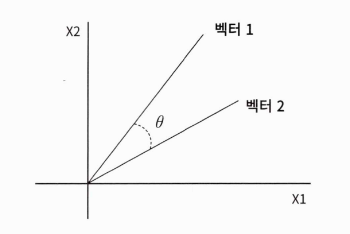

In [25]:
from IPython.display import Image
Image('./ch08_코사인유사도.png')

### O 두 벡터 사잇각

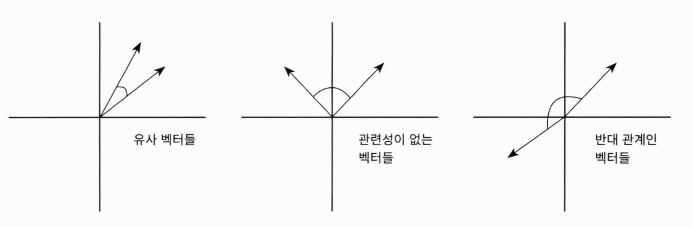

In [26]:
Image('./ch08_두벡터사잇각.png')

In [95]:
# 코사인 유사도 구하기 cos_similarity()

# import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm    
   
    return similarity

In [96]:
from sklearn.feature_extraction.text import TfidfVectorizer


doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']


tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)


(3, 18)


In [97]:
feature_vect_simple[0]

<1x18 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [98]:
feature_vect_simple[0].toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856]])

In [100]:
# todendse() : 희소 -> 밀집 행렬

# TFidfVectorizer로 transform()한 결과는 희소행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫번째 문장과 두번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1,vect2)
print('문장1, 문장2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect1 = np.array(feature_vect_dense[1]).reshape(-1,)
vect2 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1,vect2)
print('문장2,, 문장3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도 : 0.402
문장2,, 문장3 Cosine 유사도 : 0.456


In [101]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0]
                                           ,feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0]
                                           ,feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [103]:
similarity_simple_pair = cosine_similarity(feature_vect_simple,feature_vect_simple)
print(similarity_simple_pair)
print('shape : ',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape :  (3, 3)


### O Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [127]:
from sklearn.metrics.pairwise import cosine_similarity

#cluster_label = 2 인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 군집화된 문서들의 DataFrame Index: ',hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번재 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname, ' 와 타 문서 유사도 #####')

similality_pair = cosine_similarity(feature_vect[hotel_indexes[0]]
                                    ,feature_vect[hotel_indexes])

print(similality_pair)

호텔로 군집화된 문서들의 DataFrame Index:  Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')
##### 비교 기준 문서명  bathroom_bestwestern_hotel_sfo  와 타 문서 유사도 #####
[[1.         0.0430688  0.05221059 0.06189595 0.05846178 0.06193118
  0.03638665 0.11742762 0.38038865 0.32619948 0.51442299 0.11282857
  0.13989623 0.1386783  0.09518068 0.07049362]]


In [128]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

가장 유사도가 큰 파일명 및 유사도 : 
 filename      room_holiday_inn_london
similarity                   0.514423
Name: 32, dtype: object


Text(0.5, 1.0, 'bathroom_bestwestern_hotel_sfo')

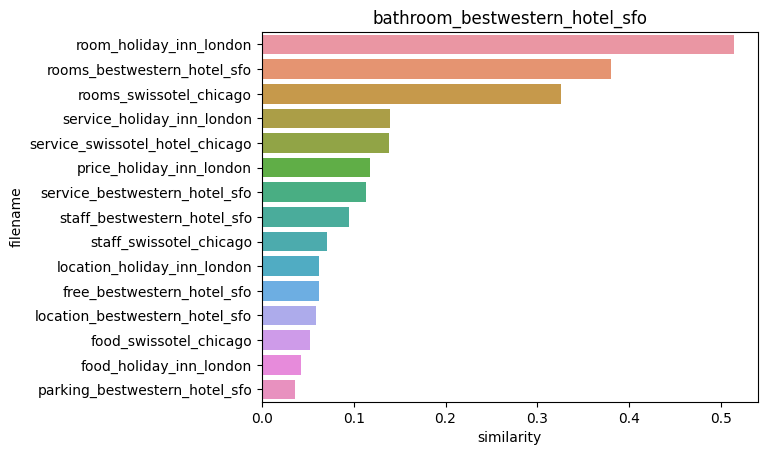

In [129]:
# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외
sorted_index = similality_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

hotel_1_sim_value = np.sort(similality_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도 : \n',hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

## **09 한글 텍스트 처리 - 네이버영화 평점 감성 분석**

### O 한글 NLP 처리의 어려움


### O KoNLP 소개

: 파이썬의 한글 형태소(의미가 부여된 최소 단위) 패키지 

$\Rightarrow$ 영어에서의 tokenizer


- 꼬끄마, 한나눔, Komaran, 은전한닢 프로젝트(Mecab), Twitter => 5개의 모듈이 있음

- Mecab이 가장 성능이 좋으나 윈도우에서 사용할 수 없음 => 구글 코랩을 통해 사용

- vscode에서는 다음으로 성능이 좋은 Twitter 사용

In [1]:
from konlpy.tag import Twitter

In [2]:
t = Twitter()

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### O 데이터 로딩

In [4]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split


# # url로 다운받기
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x203f46f33d0>)

In [6]:
train_df = pd.read_csv('ratings_train.txt', sep='\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [7]:
train_df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [8]:
import re


train_df = train_df.fillna(' ')
# 정규 표현식을 이용하여 숫자를 공백으로 변경(정규 표현식으로 \d 는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )


# 테스트 데이터 셋을 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )


# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)


In [29]:
train_df['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 150000, dtype: object

In [9]:
from konlpy.tag import Twitter


twitter = Twitter()
def tw_tokenizer(text):
    # 입력 인자로 들어온 text 를 형태소 단어로 토큰화 하여 list 객체 반환
    tokens_ko = twitter.morphs(text)
    return tokens_ko

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

c:\Users\user\anaconda3\envs\ml-dev\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Logistic Regression 을 이용하여 감성 분석 Classification 수행.
lg_clf = LogisticRegression(random_state=0, solver='liblinear')


# Parameter C 최적화를 위해 GridSearchCV 를 이용.
params = { 'C': [1 ,3.5, 4.5, 5.5, 10 ] }
grid_cv = GridSearchCV(lg_clf , param_grid=params , cv=3 ,scoring='accuracy', verbose=1 )
grid_cv.fit(tfidf_matrix_train , train_df['label'] )
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [12]:
from sklearn.metrics import accuracy_score


# 학습 데이터를 적용한 TfidfVectorizer를 이용하여 테스트 데이터를 TF-IDF 값으로 Feature 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])


# classifier 는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)


print('Logistic Regression 정확도: ',accuracy_score(test_df['label'],preds))


Logistic Regression 정확도:  0.86172


In [89]:
test_data = [
     '이 영화 정말 재미있어요.'
    ,'배우가 이상해ㅡㅡ'
    ,'음향은 좋았지만 스토리가 너무 구려요'
    ,'연기 왜그래요?'
    ,'아이와 함께 봤어요 아이가 좋아하네요'
    ,'영상미가 미쳤어요'
    ,'큰 기대는 하지 마세요'
    ,'액션이 좀 과장되면서 공감대 형성은 어렵지만, 시원한 타격감은 전편보다는 훨씬 낫다.'
]

In [90]:
test_data

['이 영화 정말 재미있어요.',
 '배우가 이상해ㅡㅡ',
 '음향은 좋았지만 스토리가 너무 구려요',
 '연기 왜그래요?',
 '아이와 함께 봤어요 아이가 좋아하네요',
 '영상미가 미쳤어요',
 '큰 기대는 하지 마세요',
 '액션이 좀 과정되면서 공감대 형성은 어렵지만, 시원한 타격감은 전편보다는 훨씬 낫다.']

In [91]:
# 예제 데이터 tfidf 변환
tfidf_test_data = tfidf_vect.transform(test_data)

In [92]:
test_pred = best_estimator.predict(tfidf_test_data)

In [93]:
print('Logistic Regression 정확도: ',accuracy_score([1,0,0,0,1,1,0,1],test_pred))

Logistic Regression 정확도:  1.0


## **10 텍스트 분석 실습 - 캐글 Mercari Prince Suggestion Challenge**

### O 데이터 전처리

### O 피처 인코딩과 피처 벡터화

### O 릿지 회귀 모델 구축 및 평가

### O LightGBM 회귀 모델 구축과 앙상블을 이용한 최종 예측 평가